<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

(-2, 5)

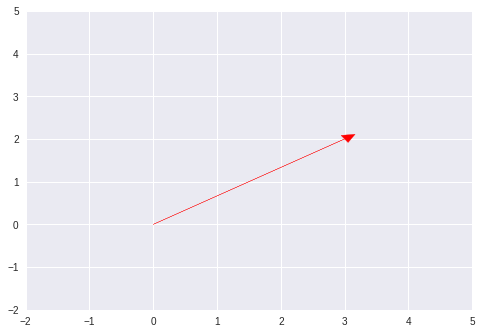

In [1]:
a = [3,2]


import matplotlib.pyplot as plt

plt.arrow(0,0, a[0], a[1], head_width=.2, head_length=0.2, color ='red')

plt.xlim(-2, 5)
plt.ylim(-2, 5)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [9]:
import numpy as np 
from math import sqrt 
from numpy.testing import assert_almost_equal

b = [17, -4, -2, 1]

len_b = np.linalg.norm(b)

print(len_b)

assert_almost_equal(sqrt(17**2 + 4**2 + 2**2 + 1**2), len_b)

print("a vector norm is a euclidean length. The pythagorean theorem describes the vector norm in R^2. in physics, we call it magnitude. ")

17.60681686165901
a vector norm is a euclidean length. The pythagorean theorem describes the vector norm in R^2. in physics, we call it magnitude. 


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [10]:
c = [3,7,-2,12]
d = [9,-7,4,6]

np.dot(c,d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [20]:
E = np.asmatrix([[7,4,3], [1,3,-1], [2,6,-4]])

E_inv = np.linalg.inv(E)
I3 = np.identity(3)

E_transpose = E.T

assert_almost_equal(E_transpose.T, E)

assert_almost_equal(np.matmul(E, E_inv), I3)
assert_almost_equal(np.matmul(E_inv, E), I3)

print("E^-1: {}".format(E_inv))

print("E^T: {}".format(E_transpose))

E^-1: [[ 0.17647059 -1.          0.38235294]
 [-0.05882353  1.         -0.29411765]
 [ 0.          1.         -0.5       ]]
E^T: [[ 7  1  2]
 [ 4  3  6]
 [ 3 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [23]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [41]:
def report(df): 
  assert len(df.columns)==2
  s1 = "The mean daily customers that week was {:.2f}, with a variance of {:.2f} \
    and standard deviation of {:.2f}".format(
      df.mean()[0], df.var()[0], df.std()[0])
  s2 = "The mean fresh powder measured that week was {:.2f}, \
    with a variance of {:.2f} and a standard deviation of {:.2f}".format(
      df.mean()[1], df.var()[1], df.std()[1])
  return s1 + '\n\n' + s2

print(report(df))

The mean daily customers that week was 1135.71, with a variance of 98761.90     and standard deviation of 314.26

The mean fresh powder measured that week was 2.71,     with a variance of 8.57 and a standard deviation of 2.93


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [67]:
# https://en.wikipedia.org/wiki/Coefficient_of_variation

customers_coefvar = df.std()[0] / df.mean()[0]

powder_coefvar = df.std()[1] / df.mean()[1]

cov_divided_by_stdvsproduct = (df.cov() / (df.std()[0] * df.std()[1]))
pearson_coef = cov_divided_by_stdvsproduct.iloc[0][1]

print("\nabs difference between coefficients of variation: {}".format(abs(customers_coefvar - powder_coefvar)))

print("\nPearson's correlation coefficient: {}".format(pearson_coef))



abs difference between coefficients of variation: 0.8019158958343268

Pearson's correlation coefficient: 0.7284634644730712


### We should be roughly ~75% confident that variance in customers and variance in inches are comparable.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [71]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [73]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [74]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [0]:
# # We'll also turn the X dataframe into an numpy array for you in case 
# # you're more familiar with using numpy arrays ;)

# # You may choose which one you would rather use.

# # Feel free to change the variable names if you don't like mine.

# numpy_X = X.values
# print(numpy_X)

In [119]:
from sklearn.preprocessing import StandardScaler

zcaler = StandardScaler()

zcaler.fit(X)
nrmzdX = pd.DataFrame(zcaler.transform(X))


for x in nrmzdX.mean(): 
  assert_almost_equal(x,0)

# stdvs are not 1 for some reason, but they are all the same  
# for y in nrmzdX.std(): 
#   assert_almost_equal(y,1)



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [120]:
from sklearn.decomposition import PCA
import altair as alt

pca = PCA(n_components = 2)

X_pca2 = pd.DataFrame(pca.fit_transform(nrmzdX), columns = ['PC 1', 'PC 2'])

alt.Chart(X_pca2).mark_circle().encode(x='PC 1', y='PC 2')

Chart({
  data:        PC 1      PC 2
  0 -0.954490  0.328318
  1 -4.520951 -1.735380
  2  0.487978  3.233672
  3  4.987462 -1.826611,
  encoding: EncodingWithFacet({
    x: X({
      shorthand: 'PC 1'
    }),
    y: Y({
      shorthand: 'PC 2'
    })
  }),
  mark: 'circle'
})

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [167]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')

points['responsibility'] = [99999] * points.shape[0]

N = points.shape[0]

points.head()

,x,y,responsibility
0,-7.846803,-3.421277,99999
1,-3.554323,-6.884729,99999
2,-0.192822,-9.671030,99999
3,-6.401456,-5.223972,99999
4,-0.804026,-9.704457,99999


In [168]:
alt.Chart(points).mark_circle().encode(x='x', y='y')

# from eyeball, we will select K=4 or K=5

Chart({
  data:             x          y  responsibility
  0   -7.846803  -3.421277           99999
  1   -3.554323  -6.884729           99999
  2   -0.192822  -9.671030           99999
  3   -6.401456  -5.223972           99999
  4   -0.804026  -9.704457           99999
  5   -4.977194  -6.138836           99999
  6   -8.118990  -3.624109           99999
  7   -8.145629  -2.787951           99999
  8   -3.568659   5.401781           99999
  9   -5.711709  -6.802013           99999
  10  -4.006063  -7.994846           99999
  11  -4.347019  -7.073274           99999
  12   0.022885 -10.572200           99999
  13  -4.653388  -8.100571           99999
  14  -8.263067  -4.364782           99999
  15  -1.789254 -11.095795           99999
  16  -7.566834  -4.391664           99999
  17  -3.002127  -5.738567           99999
  18  -2.576739  -7.832238           99999
  19   6.740574   4.137309           99999
  20  -7.966105  -3.149976           99999
  21   6.265568   5.013316           99999
  22   6.285179   4.447087           99999
  23   6.405280   4.383793           99999
  24  -2.685595  -8.512655           99999
  25  -5.283027  -9.341710           99999
  26   0.070973 -10.113713           99999
  27  -1.640516   4.002641           99999
  28  -4.606712  -8.366558           99999
  29  -4.683859  -7.267107           99999
  ..        ...        ...             ...
  170 -9.848325  -4.336462           99999
  171 -0.456371 -10.274750           99999
  172 -3.581746   4.609201           99999
  173  7.807885   3.468522           99999
  174 -0.580261  -9.912767           99999
  175 -2.216288  -7.172240           99999
  176 -3.430369  -6.336909           99999
  177 -3.718590  -8.091516           99999
  178 -5.702522  -6.563601           99999
  179 -7.262219  -4.399703           99999
  180 -4.181205  -6.166264           99999
  181 -0.799163  -8.396208           99999
  182 -3.385628  -5.660493           99999
  183 -2.760584  -8.127126           99999
  184 -1.771113  -9.814862           99999
  185 -2.796932  -9.090069           99999
  186 -9.770175  -4.561341           99999
  187  7.430405   3.004416           99999
  188 -3.922665   5.117327           99999
  189  0.049603  -8.432009           99999
  190 -3.488445  -8.018975           99999
  191 -9.152373  -4.380759           99999
  192  6.330956   4.607543           99999
  193 -7.483404  -2.071589           99999
  194 -4.581117  -9.286410           99999
  195 -3.560689   4.567320           99999
  196  5.051216   4.745086           99999
  197  6.127624   4.285188           99999
  198 -1.783078  -8.890394           99999
  199 -0.339587  -8.344952           99999
  
  [200 rows x 3 columns],
  encoding: EncodingWithFacet({
    x: X({
      shorthand: 'x'
    }),
    y: Y({
      shorthand: 'y'
    })
  }),
  mark: 'circle'
})

In [0]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, random_state=0).fit(points.drop('responsibility', axis=1))
# km.labels_

means = pd.DataFrame(km.cluster_centers_, columns=['means_x', 'means_y'])

# for k in range(N): 
#   points.responsibility.iloc[k] = km.labels_[k]

points.responsibility = km.labels_


In [197]:

dat = alt.Chart(points).mark_circle().encode(x='x', y='y', color='responsibility:N')

mns = alt.Chart(means).mark_point(shape='cross', size=300).encode(x='means_x', y='means_y')

dat + mns

LayerChart({
  layer: [Chart({
    data:             x          y  responsibility
    0   -7.846803  -3.421277               4
    1   -3.554323  -6.884729               0
    2   -0.192822  -9.671030               3
    3   -6.401456  -5.223972               4
    4   -0.804026  -9.704457               3
    5   -4.977194  -6.138836               0
    6   -8.118990  -3.624109               4
    7   -8.145629  -2.787951               4
    8   -3.568659   5.401781               2
    9   -5.711709  -6.802013               0
    10  -4.006063  -7.994846               0
    11  -4.347019  -7.073274               0
    12   0.022885 -10.572200               3
    13  -4.653388  -8.100571               0
    14  -8.263067  -4.364782               4
    15  -1.789254 -11.095795               3
    16  -7.566834  -4.391664               4
    17  -3.002127  -5.738567               0
    18  -2.576739  -7.832238               0
    19   6.740574   4.137309               1
    20  -7.966105  -3.149976               4
    21   6.265568   5.013316               1
    22   6.285179   4.447087               1
    23   6.405280   4.383793               1
    24  -2.685595  -8.512655               0
    25  -5.283027  -9.341710               0
    26   0.070973 -10.113713               3
    27  -1.640516   4.002641               2
    28  -4.606712  -8.366558               0
    29  -4.683859  -7.267107               0
    ..        ...        ...             ...
    170 -9.848325  -4.336462               4
    171 -0.456371 -10.274750               3
    172 -3.581746   4.609201               2
    173  7.807885   3.468522               1
    174 -0.580261  -9.912767               3
    175 -2.216288  -7.172240               0
    176 -3.430369  -6.336909               0
    177 -3.718590  -8.091516               0
    178 -5.702522  -6.563601               0
    179 -7.262219  -4.399703               4
    180 -4.181205  -6.166264               0
    181 -0.799163  -8.396208               3
    182 -3.385628  -5.660493               0
    183 -2.760584  -8.127126               0
    184 -1.771113  -9.814862               3
    185 -2.796932  -9.090069               0
    186 -9.770175  -4.561341               4
    187  7.430405   3.004416               1
    188 -3.922665   5.117327               2
    189  0.049603  -8.432009               3
    190 -3.488445  -8.018975               0
    191 -9.152373  -4.380759               4
    192  6.330956   4.607543               1
    193 -7.483404  -2.071589               4
    194 -4.581117  -9.286410               0
    195 -3.560689   4.567320               2
    196  5.051216   4.745086               1
    197  6.127624   4.285188               1
    198 -1.783078  -8.890394               3
    199 -0.339587  -8.344952               3
    
    [200 rows x 3 columns],
    encoding: EncodingWithFacet({
      color: Color({
        shorthand: 'responsibility:N'
      }),
      x: X({
        shorthand: 'x'
      }),
      y: Y({
        shorthand: 'y'
      })
    }),
    mark: 'circle'
  }), Chart({
    data:     means_x   means_y
    0 -3.780539 -7.605906
    1  6.249793  3.844572
    2 -3.597407  4.133441
    3 -0.476115 -9.494754
    4 -8.366530 -3.612381,
    encoding: EncodingWithFacet({
      x: X({
        shorthand: 'means_x'
      }),
      y: Y({
        shorthand: 'means_y'
      })
    }),
    mark: MarkDef({
      shape: 'cross',
      size: 300,
      type: 'point'
    })
  })]
})